In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 경로를 직접 지정 (터미널에서 찾은 경로를 넣기)
font_path = "/System/Library/Fonts/STHeiti Medium.ttc"  # 경로는 확인한 폰트에 맞게 수정!
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

import os
os.chdir('/Users/kyuyeonhwang/Desktop/Dissertation/Data/한국데이터')

In [2]:
df = pd.read_excel('stockflow.xlsx')

In [3]:
df.head()

,hd_flow_effect,hd_stock_effect,Time
0,0.303860,-1.437489,2003Q4
1,0.073217,-1.427760,2004Q1
2,0.167251,-1.427999,2004Q2
3,0.234597,-1.427747,2004Q3
4,0.196155,-1.428562,2004Q4


In [5]:
dfc = pd.read_excel('cstockflow.xlsx')

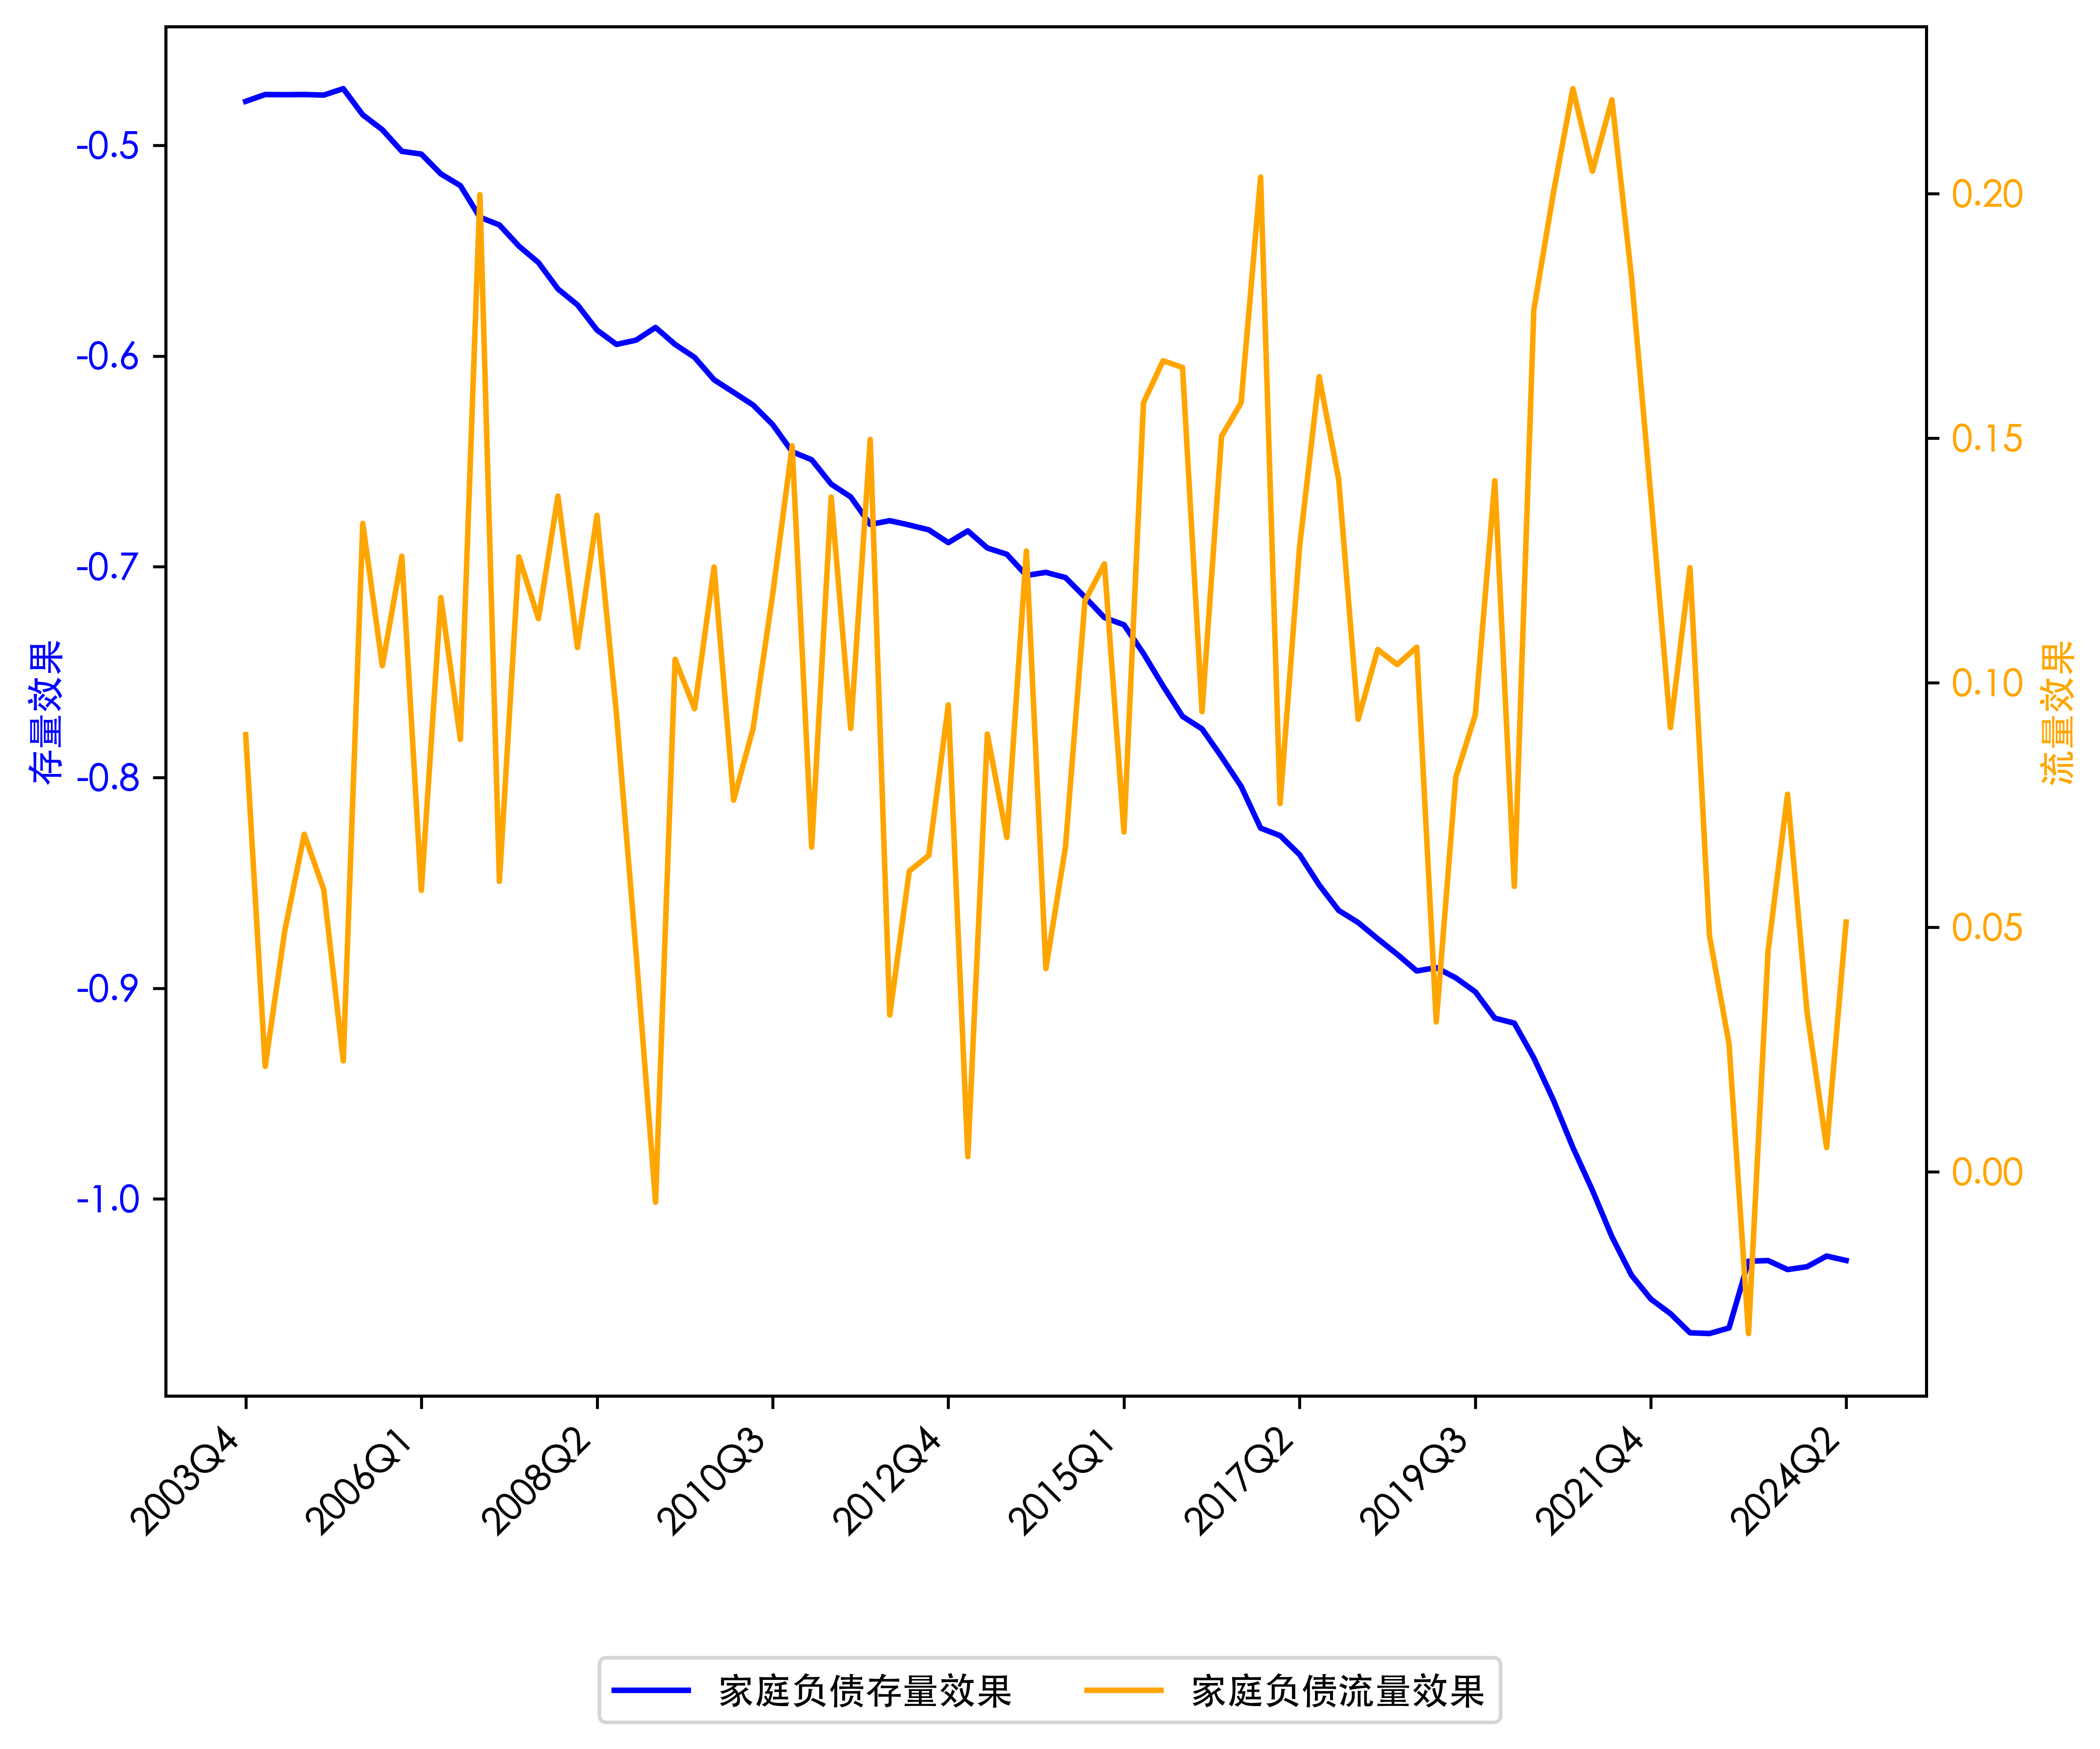

In [6]:
dfc['hd_cstock_effect'] = dfc['hd_cstock_effect']*10
dfc['hd_cflow_effect'] = dfc['hd_cflow_effect']*10

fig2, ax1 = plt.subplots(figsize=(8,6), dpi=600)

# 왼쪽 Y축 (存量效果)
ax1.plot(dfc['Time'], dfc['hd_cstock_effect'],
         color='blue', label='家庭负债存量效果')
ax1.set_ylabel('存量效果', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 오른쪽 Y축 (流量效果)
ax2 = ax1.twinx()
ax2.plot(dfc['Time'], dfc['hd_cflow_effect'],
         color='orange', label='家庭负债流量效果')
ax2.set_ylabel('流量效果', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# x축 라벨(분기) 간격 조정 (예: 4분기 단위로 표시)
tick_step = 4
tick_indices = np.arange(0, len(dfc), tick_step)
ax1.set_xticks(tick_indices)
ax1.set_xticklabels(dfc['Time'].iloc[tick_indices], rotation=45, ha='right')

tick_indices = np.linspace(0, len(dfc)-1, 10, dtype=int)
ax1.set_xticks(tick_indices)
ax1.set_xticklabels(dfc['Time'].iloc[tick_indices])

# 범례를 그래프 하단에 배치
fig2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# 레이아웃 조정 (라벨이 겹치지 않도록)
plt.tight_layout()

plt.show()

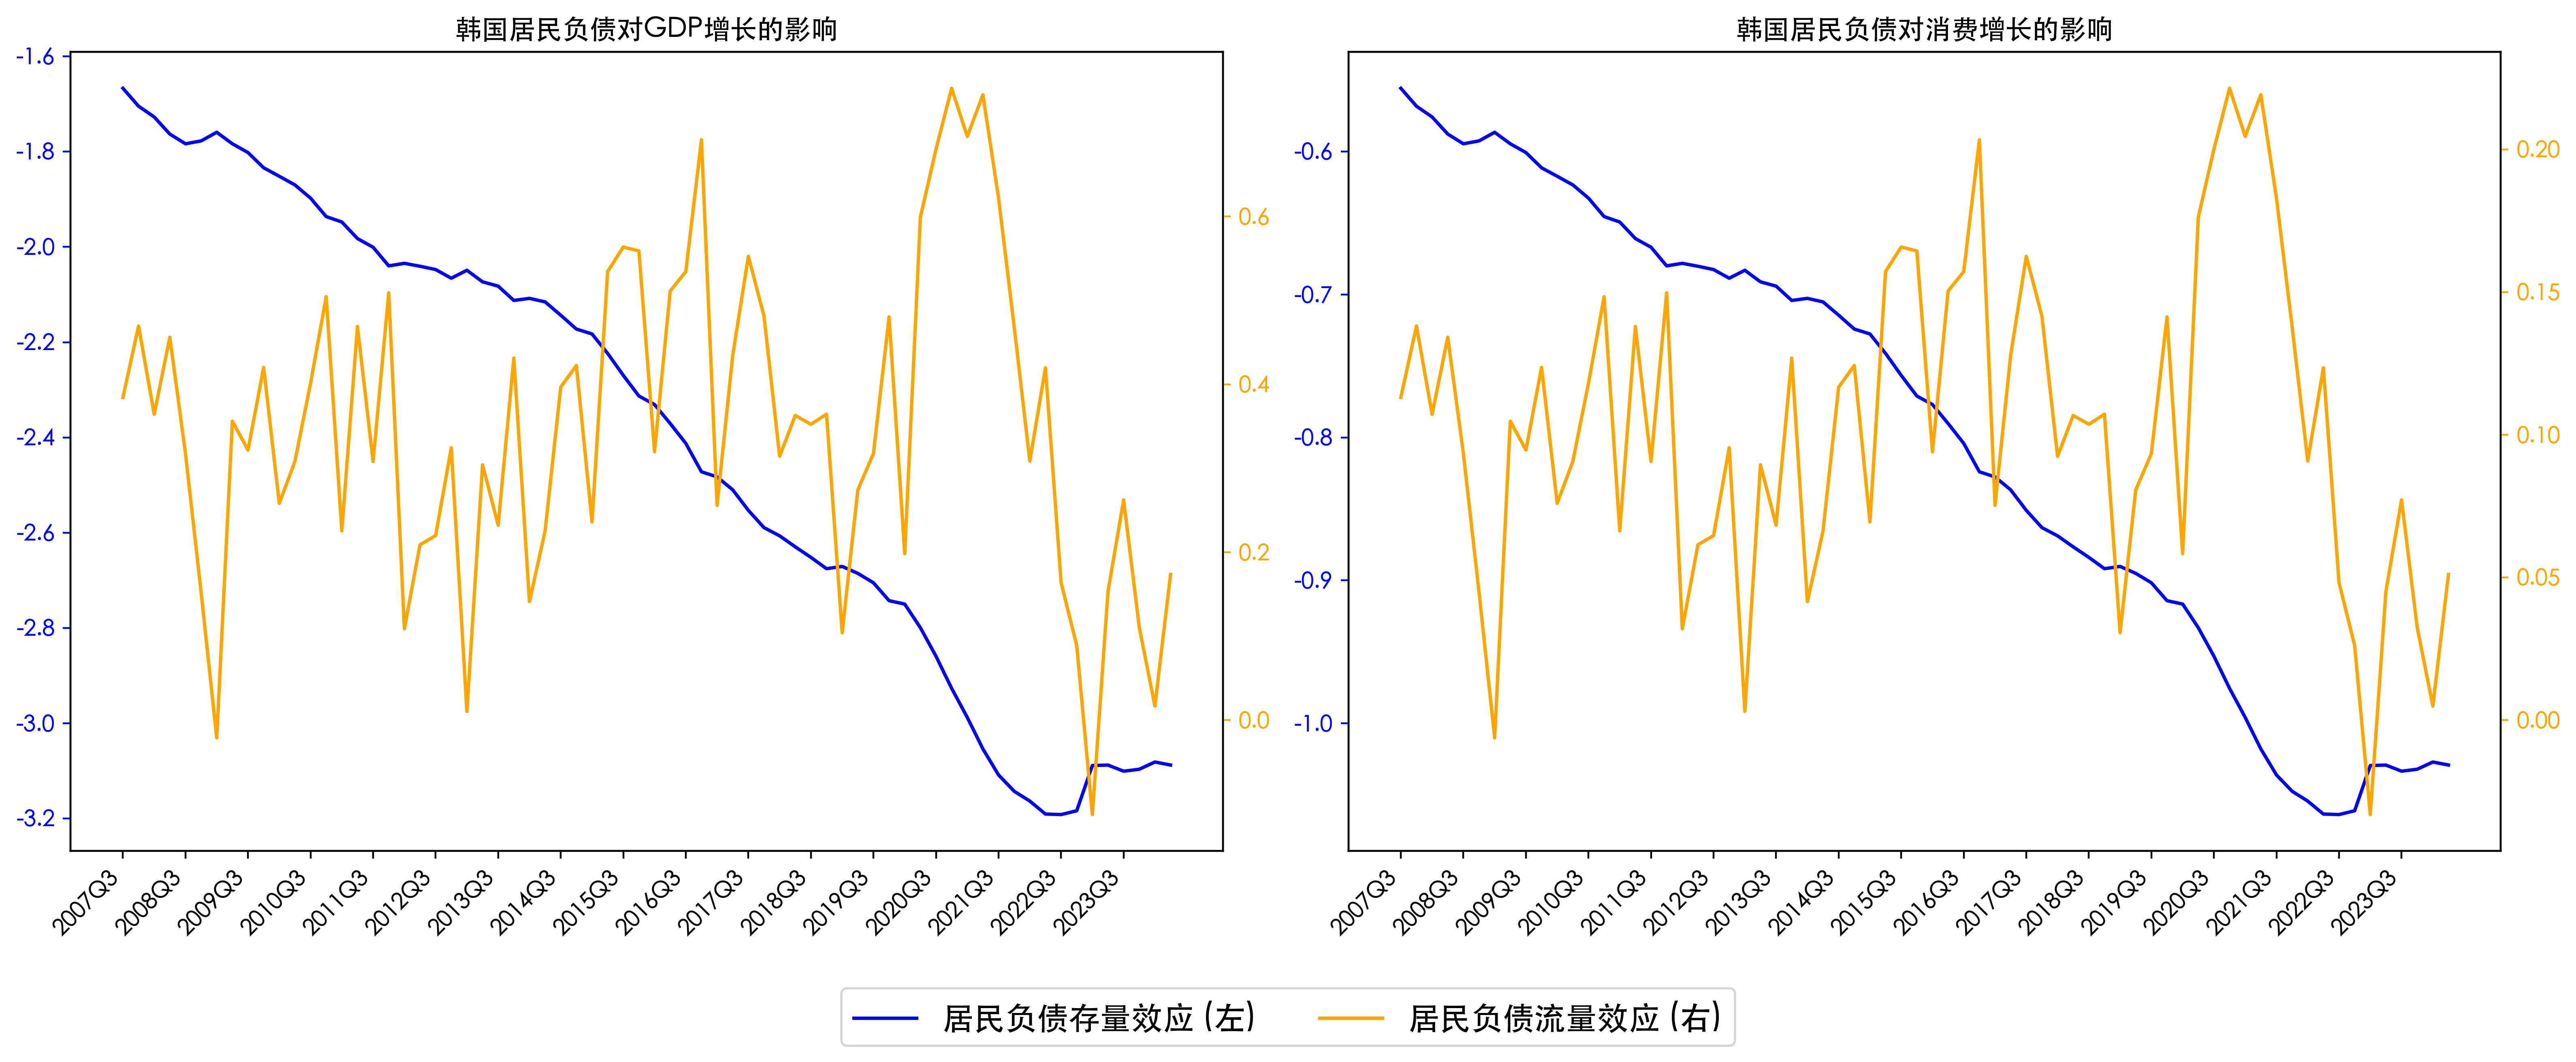

In [7]:
# 2007Q3 이후의 데이터만 필터링
df_filtered = df[df['Time'] >= "2007Q3"]
dfc_filtered = dfc[dfc['Time'] >= "2007Q3"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=400)  # 1행 2열 그래프 생성

# 첫 번째 그래프 (df 데이터)
ax1 = axes[0]
ax1.set_title("韩国居民负债对GDP增长的影响", fontsize=12)  # 첫 번째 그래프 소제목 추가
line1, = ax1.plot(df_filtered['Time'], df_filtered['hd_stock_effect'], color='blue', label='居民负债存量效应 (左)')
ax1.tick_params(axis='y', left=True, labelleft=True, colors='blue')  # 왼쪽 Y축 숫자 색상 변경

ax2 = ax1.twinx()  # 오른쪽 Y축 추가
line2, = ax2.plot(df_filtered['Time'], df_filtered['hd_flow_effect'], color='orange', label='居民负债流量效应 (右)')
ax2.tick_params(axis='y', right=True, labelright=True, colors='orange')  # 오른쪽 Y축 숫자 색상 변경

# x축 라벨 설정 (4분기 단위)
tick_step = 4
tick_indices = np.arange(0, len(df_filtered), tick_step)
ax1.set_xticks(tick_indices)
ax1.set_xticklabels(df_filtered['Time'].iloc[tick_indices], rotation=45, ha='right')

# 두 번째 그래프 (dfc 데이터)
ax3 = axes[1]
ax3.set_title("韩国居民负债对消费增长的影响", fontsize=12)  # 두 번째 그래프 소제목 추가
line3, = ax3.plot(dfc_filtered['Time'], dfc_filtered['hd_cstock_effect'], color='blue', label='居民负债存量效应 (左)')
ax3.tick_params(axis='y', left=True, labelleft=True, colors='blue')  # 왼쪽 Y축 숫자 색상 변경

ax4 = ax3.twinx()  # 오른쪽 Y축 추가
line4, = ax4.plot(dfc_filtered['Time'], dfc_filtered['hd_cflow_effect'], color='orange', label='居民负债流量效应 (右)')
ax4.tick_params(axis='y', right=True, labelright=True, colors='orange')  # 오른쪽 Y축 숫자 색상 변경

# x축 라벨 설정 (4분기 단위)
tick_indices = np.arange(0, len(dfc_filtered), tick_step)
ax3.set_xticks(tick_indices)
ax3.set_xticklabels(dfc_filtered['Time'].iloc[tick_indices], rotation=45, ha='right')

# 범례 설정 (선 색상 유지)
fig.legend([line1, line2], ['居民负债存量效应 (左)', '居民负债流量效应 (右)'], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=14)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

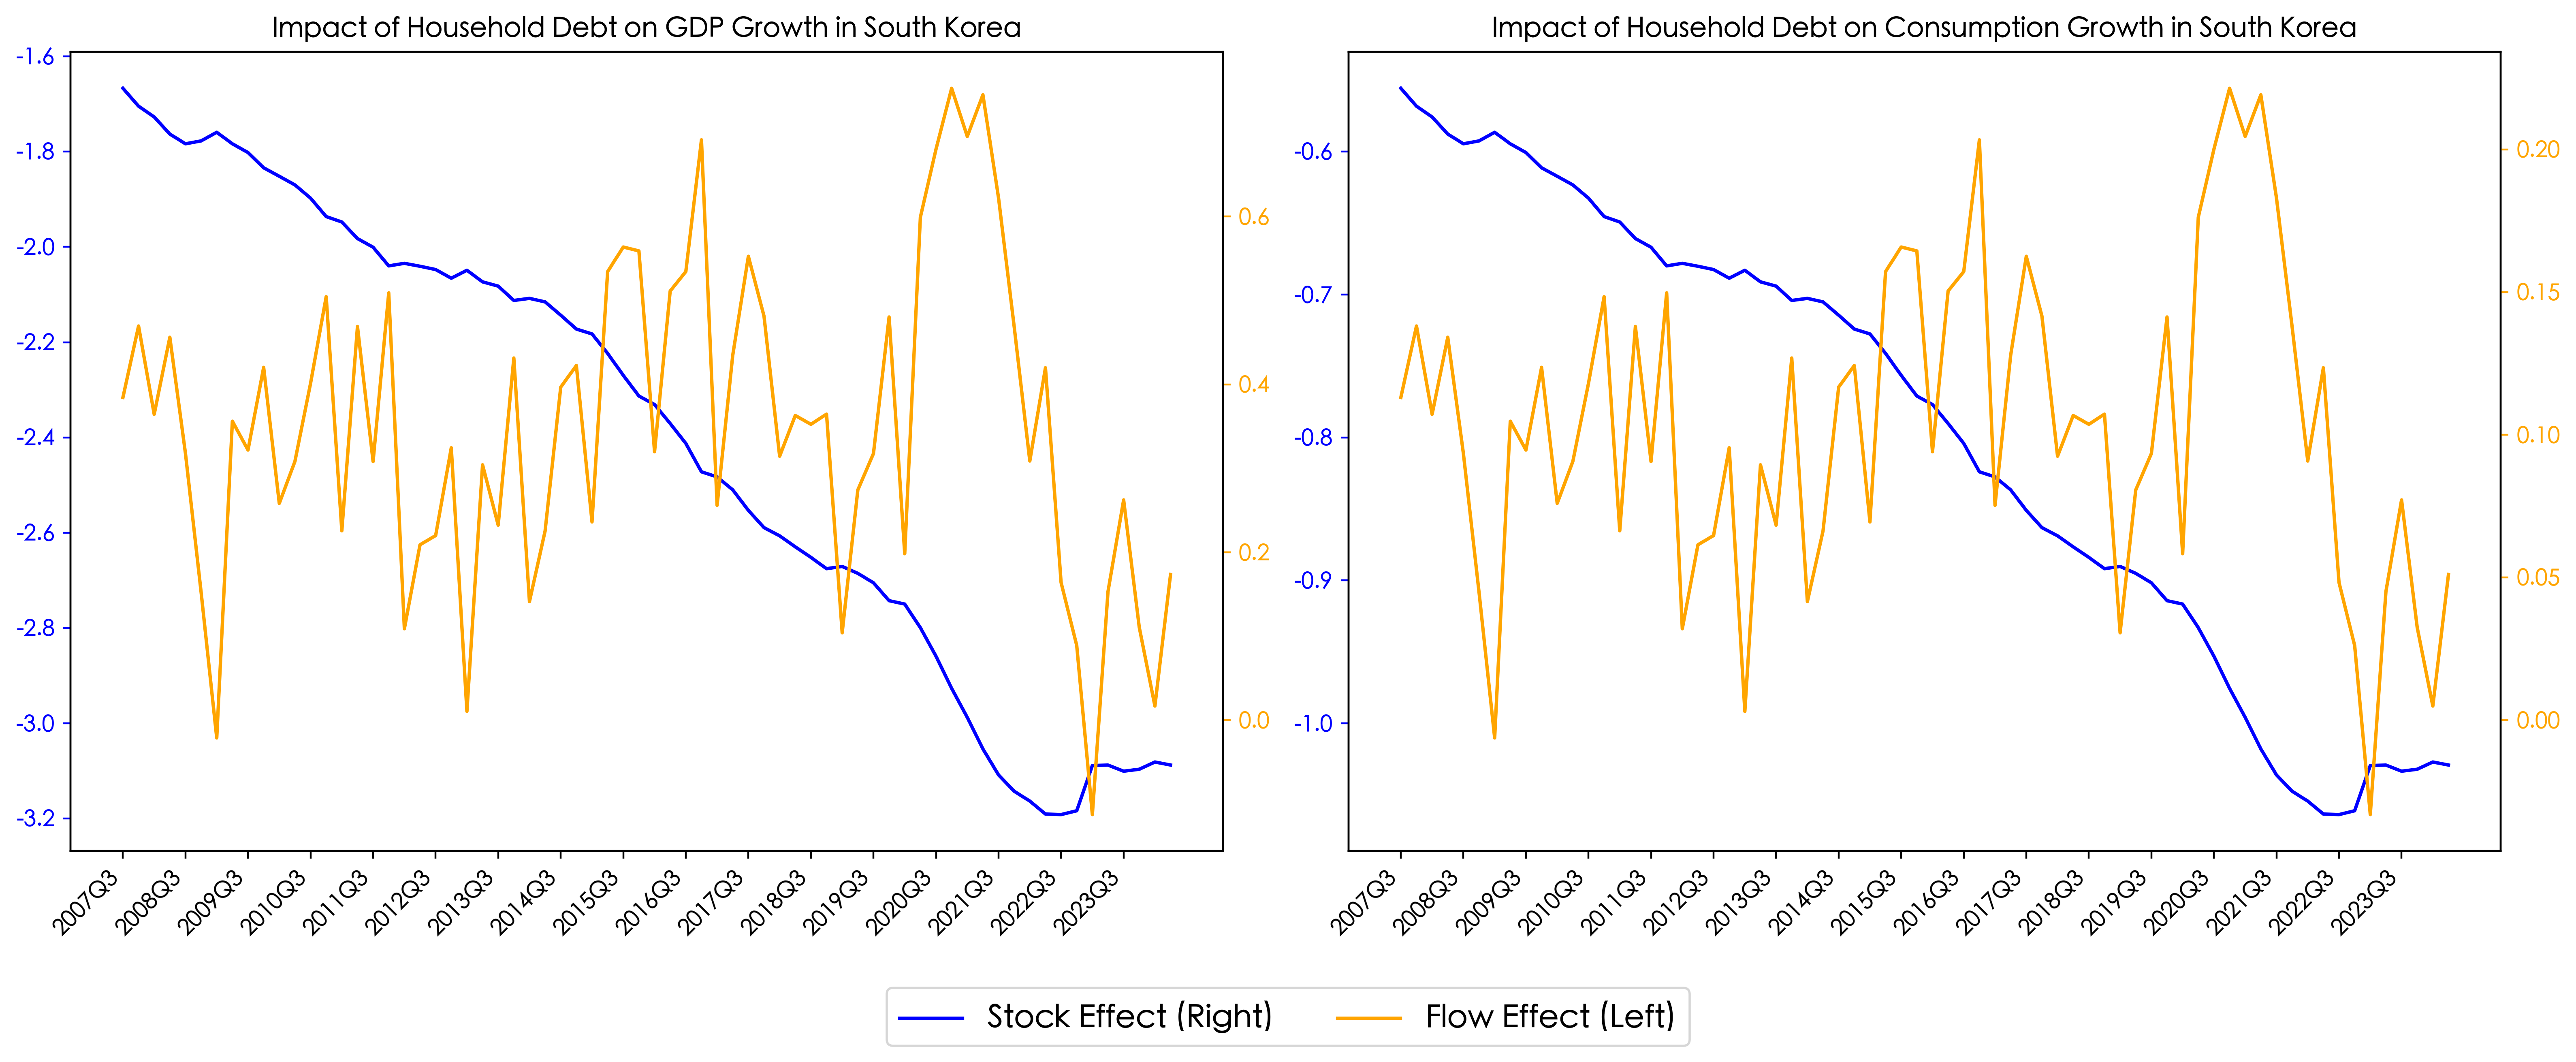

In [8]:
# 2007Q3 이후의 데이터만 필터링
df_filtered = df[df['Time'] >= "2007Q3"]
dfc_filtered = dfc[dfc['Time'] >= "2007Q3"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=400)  # 1행 2열 그래프 생성

# 첫 번째 그래프 (df 데이터)
ax1 = axes[0]
ax1.set_title("Impact of Household Debt on GDP Growth in South Korea", fontsize=12)  # 첫 번째 그래프 소제목 추가
line1, = ax1.plot(df_filtered['Time'], df_filtered['hd_stock_effect'], color='blue', label='Flow Effect (Left)')
ax1.tick_params(axis='y', left=True, labelleft=True, colors='blue')  # 왼쪽 Y축 숫자 색상 변경

ax2 = ax1.twinx()  # 오른쪽 Y축 추가
line2, = ax2.plot(df_filtered['Time'], df_filtered['hd_flow_effect'], color='orange', label='Stock Effect (Right)')
ax2.tick_params(axis='y', right=True, labelright=True, colors='orange')  # 오른쪽 Y축 숫자 색상 변경

# x축 라벨 설정 (4분기 단위)
tick_step = 4
tick_indices = np.arange(0, len(df_filtered), tick_step)
ax1.set_xticks(tick_indices)
ax1.set_xticklabels(df_filtered['Time'].iloc[tick_indices], rotation=45, ha='right')

# 두 번째 그래프 (dfc 데이터)
ax3 = axes[1]
ax3.set_title("Impact of Household Debt on Consumption Growth in South Korea", fontsize=12)  # 두 번째 그래프 소제목 추가
line3, = ax3.plot(dfc_filtered['Time'], dfc_filtered['hd_cstock_effect'], color='blue', label='Flow Effect (Left)')
ax3.tick_params(axis='y', left=True, labelleft=True, colors='blue')  # 왼쪽 Y축 숫자 색상 변경

ax4 = ax3.twinx()  # 오른쪽 Y축 추가
line4, = ax4.plot(dfc_filtered['Time'], dfc_filtered['hd_cflow_effect'], color='orange', label='Stock Effect (Right)')
ax4.tick_params(axis='y', right=True, labelright=True, colors='orange')  # 오른쪽 Y축 숫자 색상 변경

# x축 라벨 설정 (4분기 단위)
tick_indices = np.arange(0, len(dfc_filtered), tick_step)
ax3.set_xticks(tick_indices)
ax3.set_xticklabels(dfc_filtered['Time'].iloc[tick_indices], rotation=45, ha='right')

# 범례 설정 (선 색상 유지)
fig.legend([line1, line2], ['Stock Effect (Right)', 'Flow Effect (Left)'], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=14)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()